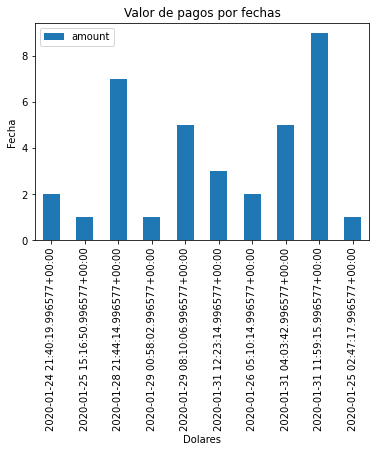

In [1]:
import psycopg2
import pandas
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt

conn = psycopg2.connect("postgresql://postgres:postgres@db")  
cursor = conn.cursor()
datos = sqlio.read_sql_query('SELECT payment_date,amount FROM payment LIMIT 10',conn)
datos.plot(kind='bar', x='payment_date',y='amount', xlabel='Dolares', ylabel='Fecha')
plt.title('Valor de pagos por fechas');
conn.close();

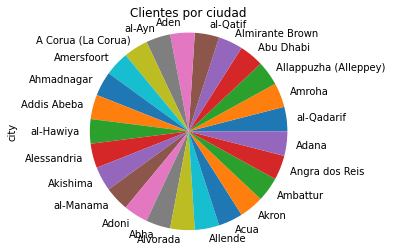

In [2]:
conn = psycopg2.connect("postgresql://postgres:postgres@db")  
cursor = conn.cursor()
datos = sqlio.read_sql_query('SELECT COUNT(c.*) AS numcustomer,ct.city FROM customer AS c \
                             INNER JOIN address AS a ON c.address_id=a.address_id \
                             INNER JOIN city AS ct ON a.city_id=ct.city_id GROUP BY ct.city_id LIMIT 25' \
                            ,conn)
datos.city.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Clientes por ciudad')
conn.close();

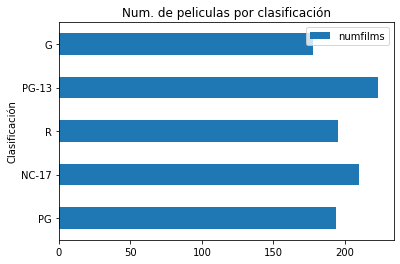

In [4]:
conn = psycopg2.connect("postgresql://postgres:postgres@db")  
cursor = conn.cursor()
datos = sqlio.read_sql_query('SELECT COUNT(f.title) AS numfilms,f.rating FROM film AS f GROUP BY f.rating',conn)
datos.plot(kind='barh', x='rating', y='numfilms', xlabel='Clasificación')
plt.title('Num. de peliculas por clasificación');
conn.close();